## EXPLANATION OF KEY ECDF FEATURES
What is ECDF?

The Empirical CDF shows:

𝐸𝐶𝐷𝐹(𝑥)= Number of samples ≤ 𝑥
𝑁
ECDF(x)=
N
Number of samples ≤x
	​


It’s the most accurate representation of the distribution (no binning like histograms).

🔍 What You Learn Here
✔ ECDF basics using seaborn
✔ Step markers showing real points
✔ Compare ECDF across categories
✔ Bootstrapped confidence interval
✔ Horizontal ECDF
✔ Comparison against cumulative histogram
✔ Pure numpy ECDF implementation
✔ Statsmodels ECDF
✔ Multi-group ECDF comparison
✔ ECDF subplots
✔ Rug + ECDF combined
✔ 2D ECDF heatmap

In [ ]:
# ! pip install statsmodels

   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.6 MB ? eta -:--:--
   ---------------------------------------  9.4/9.6 MB 39.2 MB/s eta 0:00:01
   ---------------------------------------- 9.6/9.6 MB 35.3 MB/s  0:00:00

   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   ---------------------------------------- 0/2 [patsy]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/2 [statsmodels]
   -------------------- ------------------- 1/

### Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF

### Synthetic Data Generation

In [3]:
np.random.seed(42)

# Synthetic dataset
data = pd.DataFrame({
    "value": np.random.normal(50, 7, 300),
    "category": np.random.choice(["A", "B", "C"], 300),
    "group": np.random.choice(["G1", "G2"], 300)
})


### BASIC ECDF (using seaborn)

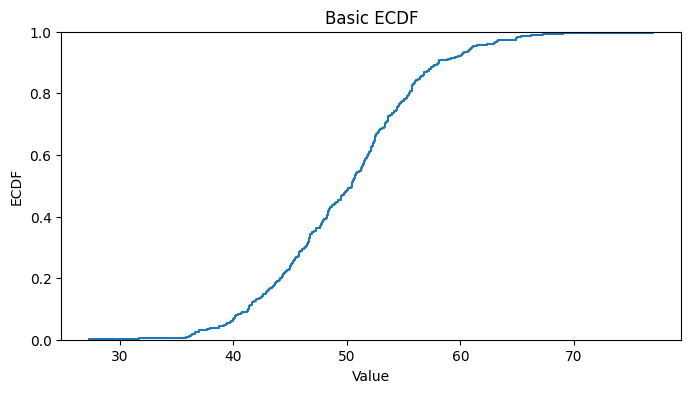

In [4]:
plt.figure(figsize=(8, 4))
sns.ecdfplot(data=data, x="value")
plt.title("Basic ECDF")
plt.xlabel("Value")
plt.ylabel("ECDF")
plt.show()

### ECDF WITH MARKERS (showing actual steps)

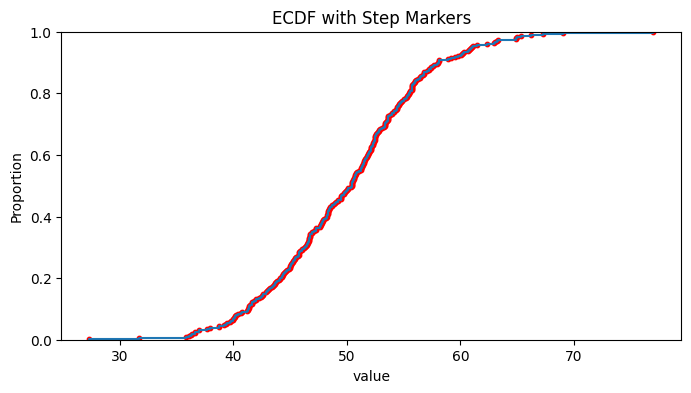

In [5]:
plt.figure(figsize=(8, 4))
sns.ecdfplot(data=data, x="value", stat="proportion")
plt.scatter(np.sort(data["value"]),
            np.arange(1, len(data) + 1) / len(data),
            s=10, color="red")
plt.title("ECDF with Step Markers")
plt.show()

### ECDF BY CATEGORY (multiple curves)

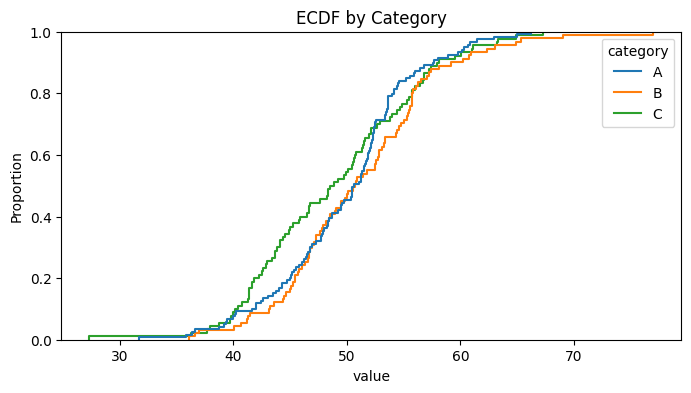

In [6]:
plt.figure(figsize=(8, 4))
sns.ecdfplot(data=data, x="value", hue="category")
plt.title("ECDF by Category")
plt.show()

### ECDF WITH CONFIDENCE INTERVALS (Bootstrapping)

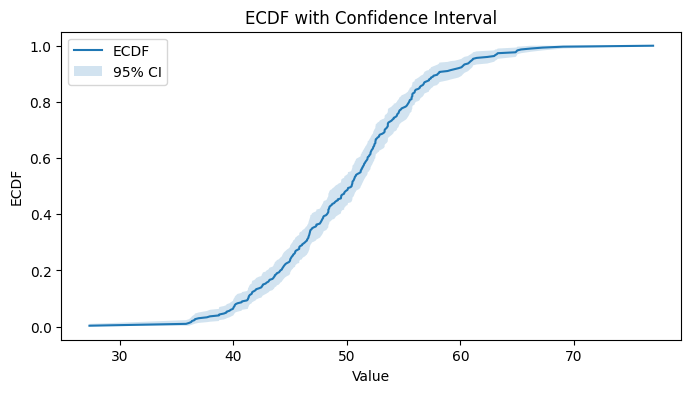

In [7]:
def bootstrap_ci(values, n_boots=2000, alpha=0.05):
    n = len(values)
    x_sorted = np.sort(values)
    y = np.arange(1, n + 1) / n  # ECDF

    boots = []
    for _ in range(n_boots):
        sample = np.random.choice(values, size=n, replace=True)
        sample_sorted = np.sort(sample)
        boots.append(np.interp(x_sorted, sample_sorted,
                               np.arange(1, n+1)/n))
    boots = np.array(boots)

    lower = np.percentile(boots, 100 * alpha / 2, axis=0)
    upper = np.percentile(boots, 100 * (1 - alpha / 2), axis=0)
    return x_sorted, y, lower, upper

plt.figure(figsize=(8, 4))
vals = data["value"]
x_sorted, y, lower, upper = bootstrap_ci(vals)

plt.plot(x_sorted, y, label="ECDF")
plt.fill_between(x_sorted, lower, upper, alpha=0.2, label="95% CI")
plt.title("ECDF with Confidence Interval")
plt.xlabel("Value")
plt.ylabel("ECDF")
plt.legend()
plt.show()

### ECDF + RUG PLOT (general)

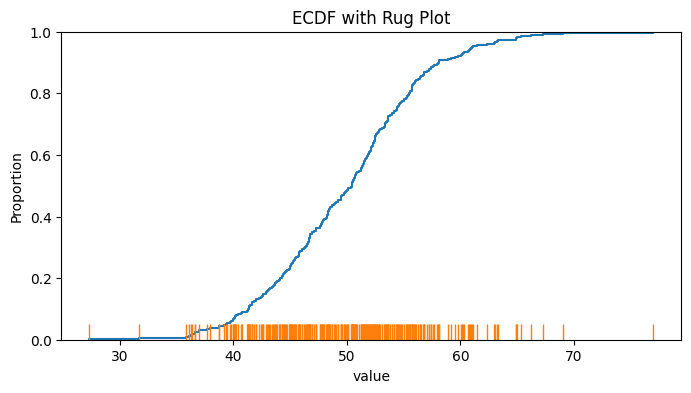

In [8]:
plt.figure(figsize=(8, 4))
sns.ecdfplot(data=data, x="value")
sns.rugplot(data=data, x="value", height=0.05)
plt.title("ECDF with Rug Plot")
plt.show()


### HORIZONTAL ECDF

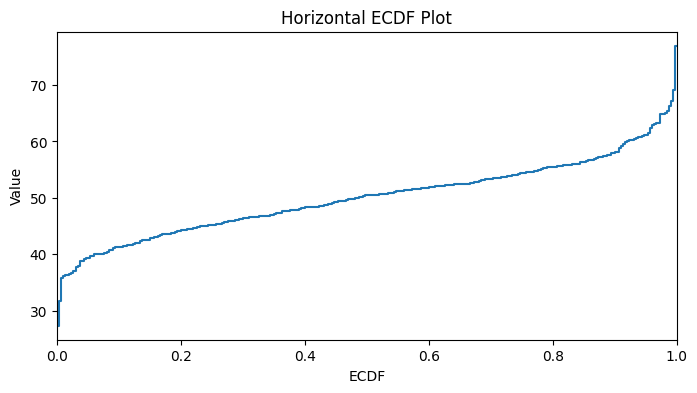

In [9]:
plt.figure(figsize=(8, 4))
sns.ecdfplot(data=data, y="value")
plt.title("Horizontal ECDF Plot")
plt.xlabel("ECDF")
plt.ylabel("Value")
plt.show()

### COMPARISON: ECDF VS CUMULATIVE HISTOGRAM

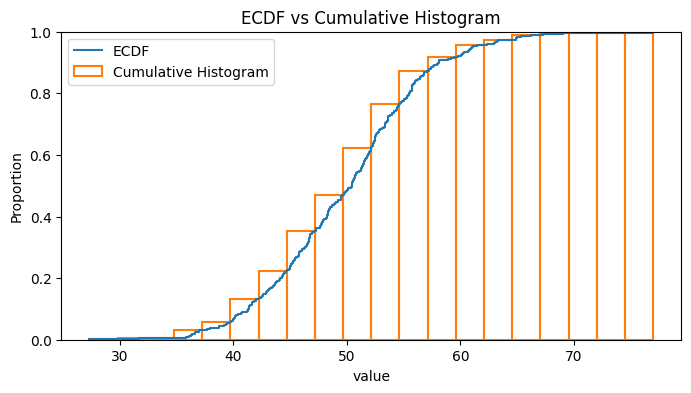

In [10]:
plt.figure(figsize=(8, 4))
sns.ecdfplot(data=data, x="value", label="ECDF")
sns.histplot(data=data, x="value", cumulative=True, stat="density",
             fill=False, bins=20, label="Cumulative Histogram")
plt.title("ECDF vs Cumulative Histogram")
plt.legend()
plt.show()

### PURE NUMPY ECDF (manual computation)

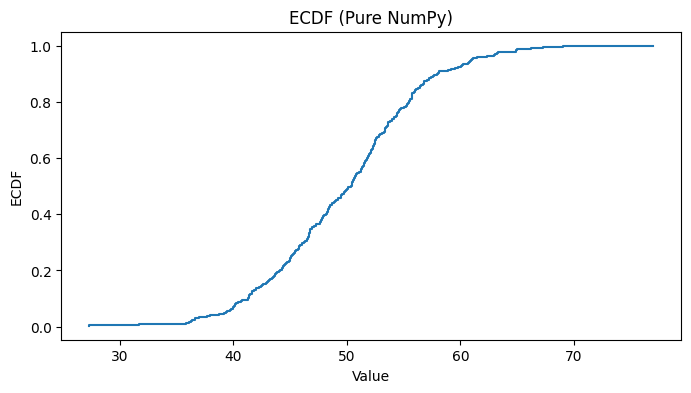

In [11]:
vals = data["value"].to_numpy()
x = np.sort(vals)
y = np.arange(1, len(vals) + 1) / len(vals)

plt.figure(figsize=(8, 4))
plt.step(x, y)
plt.title("ECDF (Pure NumPy)")
plt.xlabel("Value")
plt.ylabel("ECDF")
plt.show()

### ECDF USING STATSMODELS (step function)

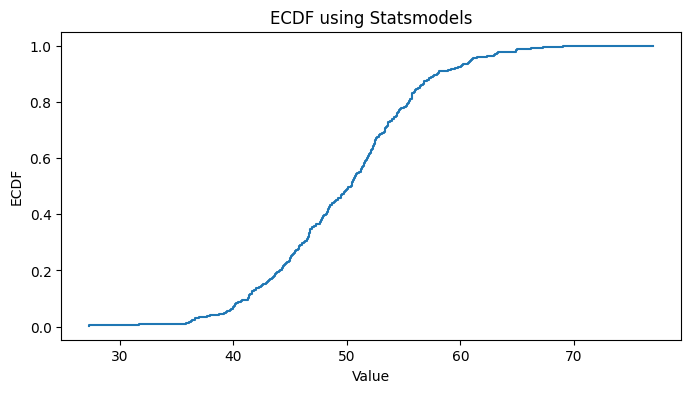

In [14]:
ecdf_obj = ECDF(data["value"])

plt.figure(figsize=(8, 4))
plt.step(ecdf_obj.x, ecdf_obj.y)
plt.title("ECDF using Statsmodels")
plt.xlabel("Value")
plt.ylabel("ECDF")
plt.show()

### ECDF BY GROUP (multiple distributions)

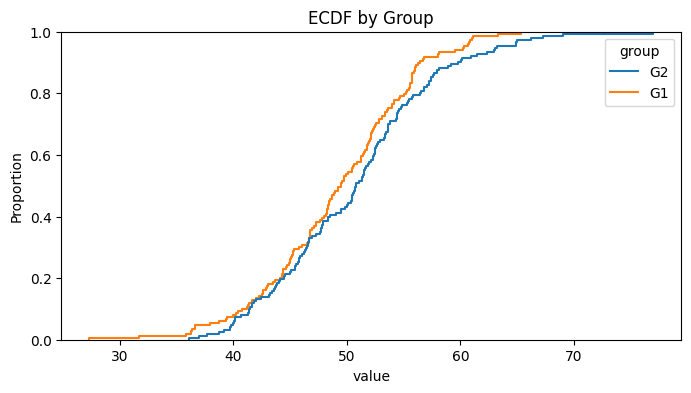

In [15]:
plt.figure(figsize=(8, 4))
sns.ecdfplot(data=data, x="value", hue="group")
plt.title("ECDF by Group")
plt.show()

### ECDF SUBPLOTS FOR CATEGORIES

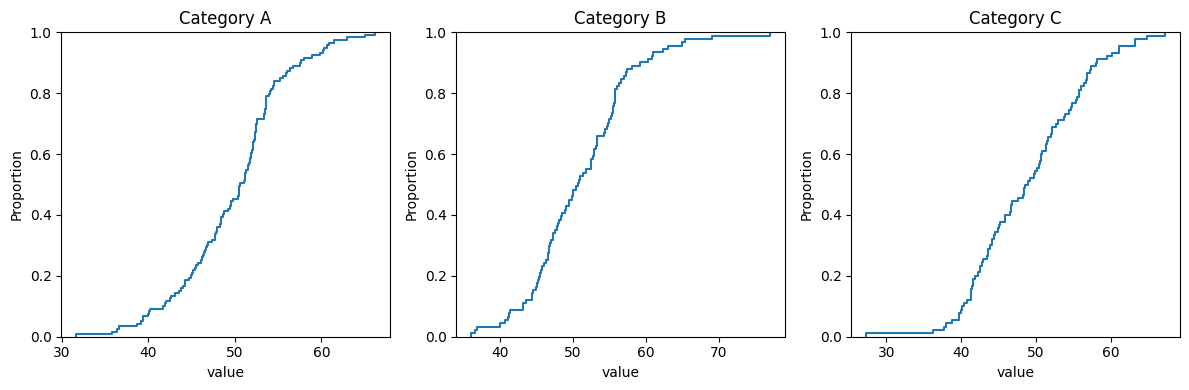

In [16]:
cats = data["category"].unique()
plt.figure(figsize=(12, 4))

for i, cat in enumerate(cats):
    plt.subplot(1, 3, i+1)
    sns.ecdfplot(data=data[data["category"] == cat], x="value")
    plt.title(f"Category {cat}")
    plt.tight_layout()

plt.show()

### 2D ECDF (Heatmap-style cumulative distribution)

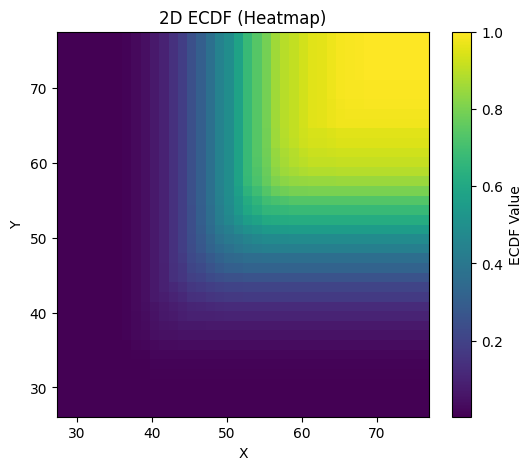

In [17]:
x_data = data["value"]
y_data = data["value"] + np.random.normal(0, 4, len(data))

# Compute 2D ECDF grid
grid_x = np.linspace(min(x_data), max(x_data), 40)
grid_y = np.linspace(min(y_data), max(y_data), 40)

ecdf_matrix = np.zeros((len(grid_x), len(grid_y)))

for i, gx in enumerate(grid_x):
    for j, gy in enumerate(grid_y):
        ecdf_matrix[i, j] = np.mean((x_data <= gx) & (y_data <= gy))

plt.figure(figsize=(6, 5))
plt.imshow(ecdf_matrix.T, origin="lower", aspect="auto",
           extent=[grid_x.min(), grid_x.max(), grid_y.min(), grid_y.max()],
           cmap="viridis")
plt.colorbar(label="ECDF Value")
plt.title("2D ECDF (Heatmap)")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()
